# Machine Learning

## NRU HSE, 2025

# Seminar 4. Calculus


In this seminar, we will practice with you writing gradient descent and finding minima of functions, which will be crucial for us when discussing machine learning later on!

In [ ]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

## Gradient descent

First, let's consider the following function on two variables:

$$f(x,y) = 5x^2 + y^2 + 1$$

### Independent Task (writing a function of two variables)

Implement in code this function from two variables!

xy - np.array

In [ ]:
def f(xy):
    x = xy[0]
    y = xy[1]
    return 5 * x ** 2 + y ** 2 + 1

To check if we have implemented it correctly, let's calculate the value at some point. For example, at the point `(0, 0)`.

In [ ]:
print(f"At the point x = {0}, y = {0}, the function takes the value {f([0,0])}")

At the point x = 0, y = 0, the function takes the value 1


Everything's great!

Let us now visualize the obtained result and plot the three-dimensional graph of our function.

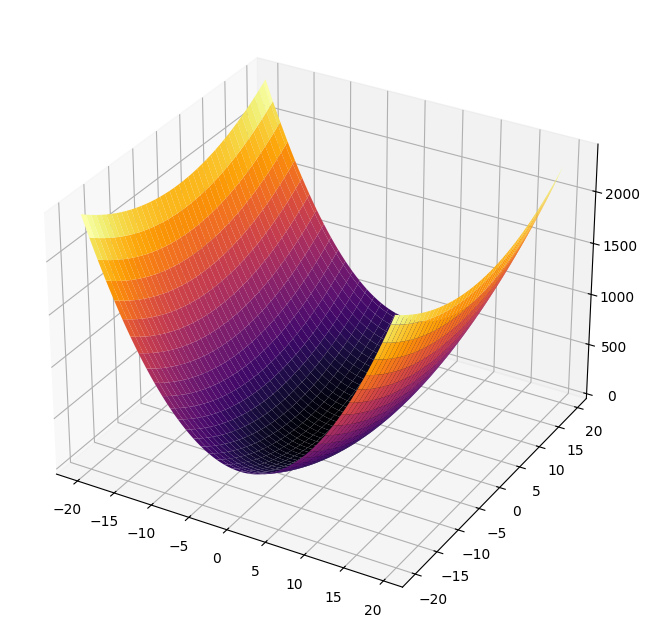

In [ ]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

If necessary, you can as always change the color palette to suit your preferences! :)

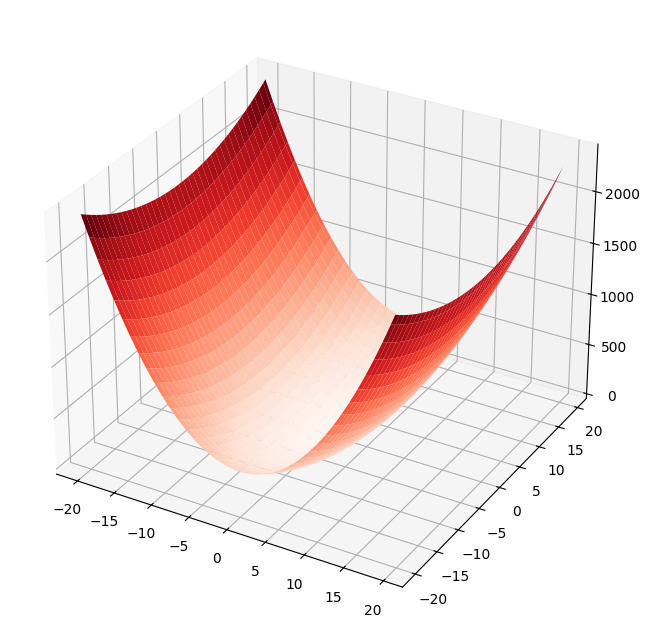

In [ ]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='Reds')

fig.show()

I think that's pretty good!

Even if you and I don't manage to master gradient descent - look, we at least learned how to draw three-dimensional graphs of functions of two variables!

Isn't that wonderful? Let's go get a job at Yandex! :)

### Question

Now let's go back to our function. What will its gradient be equal to?

The gradient of a function is a vector of its partial derivatives. Let us calculate the partial derivatives and obtain that the gradient is equal to:

$$\overline g(x,y) = (10x, 2y)$$

### Independent Task (writing the gradient of a function)

Realize the calculation of the gradient of our function!

In [ ]:
def g(xy):
    x = xy[0]
    y = xy[1]
    return np.array([10 * x, 2 * y])

Again, let's check the correctness by calculating the value of the gradient at some point

In [ ]:
print(f"At the point x = {1}, y = {2}, the gradient of the function takes the value {g([1, 2])}")

At the point x = 1, y = 2, the gradient of the function takes the value [10  4]


That's right!

### Question

At what point does this function have a minimum?

Let's proceed to finding the minimum of the function. To perform this step, let us use the gradient descent algorithm, which was discussed in detail in the lecture.

Let us only recall how it looks formulaically:

$$w^{n+1} = w^{n} - \alpha \frac{∇f(w^n)}{\|∇f(w^n)\|}$$

### Independent Task (writing a gradient descent)

Implement a function that takes as input an initial position (starting point) and a gradient calculation function and that searches for a minimum using gradient descent.


In [ ]:
def grad_descent(w0, func_grad, alpha=0.01, tolerance=0.001, n_iter=150):
    """
    args:
        - w0 - the initial vector of function arguments (initial approximation, where we start stepping from)
        - func_grad - the gradient of the function (a Python function that takes coordinates as input and calculates the gradient based on them)
        - alpha - learning rate (learning step)
        - tolerance - stopping criterion (if the change in weights is less than this value)
        - n_iter - number of iterations in gradient descent
    """

    history = [w0]

    for i in tqdm(range(n_iter)):
      w = history[-1]
      grad = func_grad(w)
      norm = np.linalg.norm(grad)
      w_new = w - alpha * grad / norm
      history.append(w_new)

    return np.array(history)

Now let's run our realized function with different starting points - for example, let's take `(18, 7)`


In [ ]:
history = grad_descent(np.array([18, 7]), g, alpha=0.01, n_iter=30000)

  0%|          | 0/30000 [00:00<?, ?it/s]

It's done!

By the way, how do you think this initial approximation, which you and I have just taken as `(18, 7)`, is usually chosen?

Let's see what the `history` array we got is equal to.

In [ ]:
history

array([[ 1.80000000e+001,  7.00000000e+000],
       [ 1.79900301e+001,  6.99922456e+000],
       [ 1.79800602e+001,  6.99844879e+000],
       ...,
       [-6.05382350e-003, -9.38724727e-323],
       [ 3.94617650e-003, -9.38724727e-323],
       [-6.05382350e-003, -9.38724727e-323]])

Let's draw how the coordinates changed in the process of finding the minimum


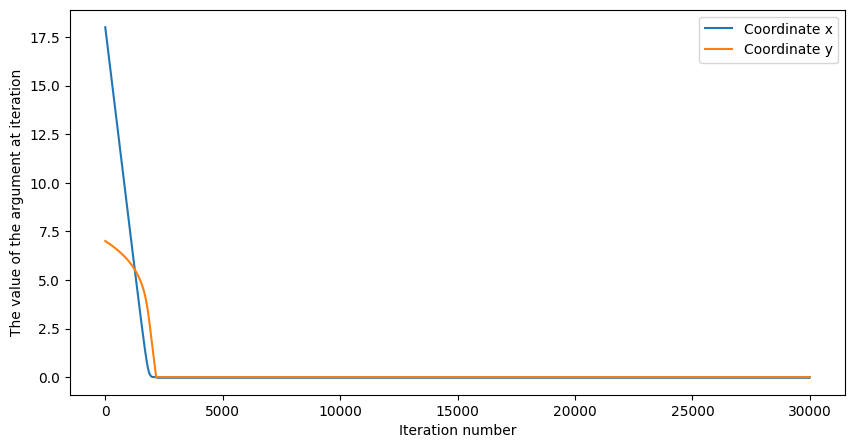

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(history)

plt.xlabel('Iteration number')
plt.ylabel('The value of the argument at iteration')

plt.legend(['Coordinate x', 'Coordinate y'])

plt.show()

Even more interesting would be to draw the path our algorithm took before converging to a minimum

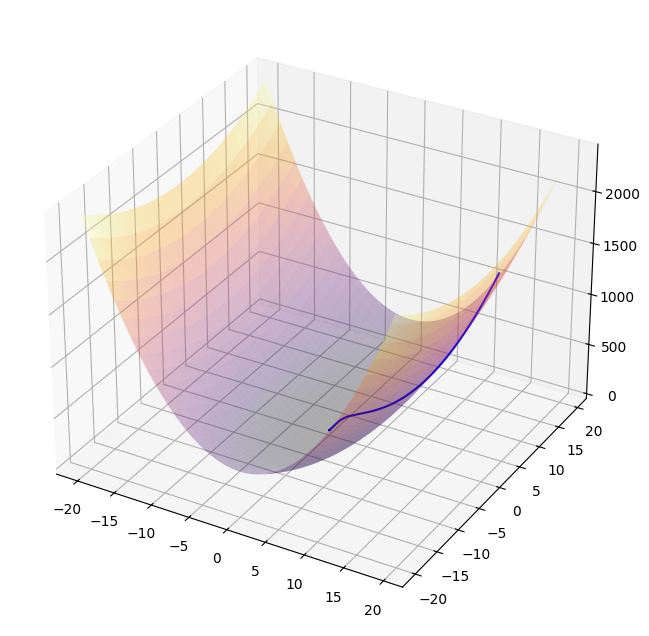

In [ ]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

# Draw the function with transparency 0.3
ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)

# Draw the path in the same way, passing the values in the zero, first
# history columns, as well as the values of the function f at these points
ax.plot(history[:, 0], history[:, 1], f([history[:, 0], history[:, 1]]), color='blue')

fig.show()

### Experimenting with functions

If you are curious and want to experiment with your functions, you can do so within this section.

For example, define your own function from 2 variables below and see what happens!

In [ ]:
def f(xy):
    x, y = xy

    return np.log((np.log(x ** 2 + 1) * y + (y - 3) * x) ** 2)

<ipython-input-92-796369ae90bf>:4: RuntimeWarning: divide by zero encountered in log
  return np.log((np.log(x ** 2 + 1) * y + (y - 3) * x) ** 2)


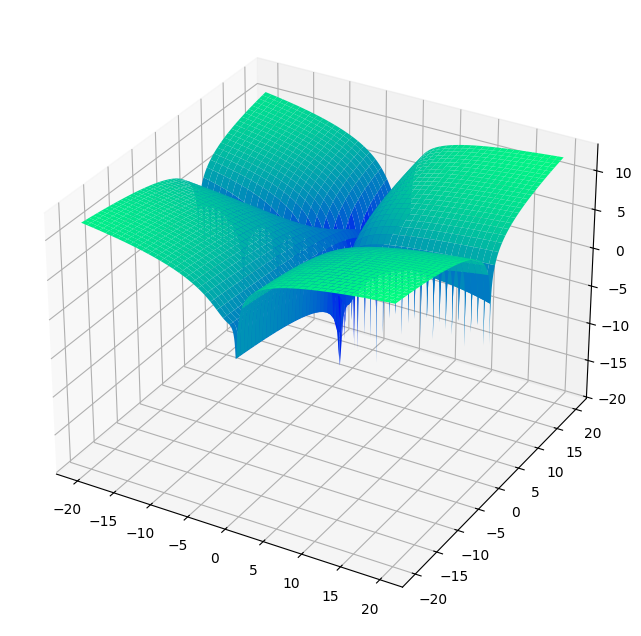

In [ ]:
u, v = np.mgrid[-20:20:0.05, -20:20:0.05]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='winter')

fig.show()

## Gradient descent modifications

Now let's look at the following function:

$$f(x, y) = (x - y)^2$$

Let's implement it in the code according to the way we did it earlier:


In [ ]:
def f(xy):
    x, y = xy

    return (x - y)**2

Let's make sure it's right

In [ ]:
print(f"At the point x = {0}, y = {0}, the function takes the value {f([0,0])}")

At the point x = 0, y = 0, the function takes the value 0


Let's build a three-dimensional graph


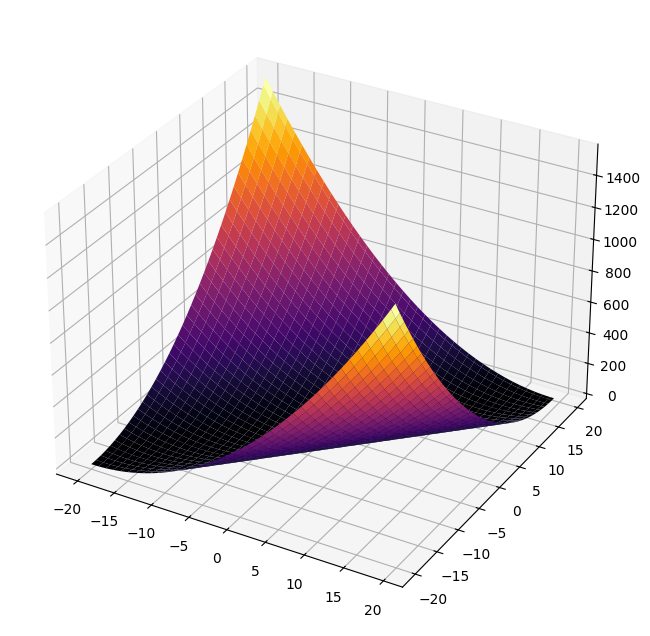

In [ ]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

### Question

What is the fundamental difference between this function and the previous one?

Now let's move on to calculating the gradient.

### Question

What is the gradient of the given function equal to?

The gradient for her would be as follows:

$$\overline g(x,y) = (2(x-y), 2(y-x))$$

Implement gradient counting:

In [ ]:
def g(xy):
  x, y = xy

  return np.array([2 * (x - y), 2 * (y - x)])

Let's check for correctness

In [ ]:
print(f"At the point x = {1}, y = {2}, the gradient of the function takes the value {g([1, 2])}")

At the point x = 1, y = 2, the gradient of the function takes the value [-2  2]


To find the minimum of a function, standard gradient descent is not always used. A good modification of gradient descent is the `momentum` algorithm.

The main advantage of the `momentum` algorithm is that it takes into account previous steps to accelerate the convergence of the algorithm. This is done by adding a fraction of the previous parameter update to the current update, which helps overcome local minima and smooth out fluctuations in the optimization process. Altogether, this leads to faster and more stable convergence of `momentum` to optimal model parameter values compared to standard gradient descent.

This is what `momentum` looks like formulaically:

$$g^{n} = \beta g^{n - 1} + (1 - \beta) \frac{∇f(w^{n-1})}{\|∇f(w^{n-1})\|}$$  

$$w^{n+1} = w^{n} - \alpha \frac{g^n}{\|g^n\|}$$

**NOTE:** $g^0$ is taken to be 0, because we have no inertia before the motion starts.

### Independent Task (Implementing Momentum)

Implement a function that takes an initial position (starting point) and a gradient computation function, and searches for the minimum using the `momentum` algorithm.


In [ ]:
# Implement a function that takes the initial position and the gradient calculation function and finds the minimum using the momentum method

def momentum(w0, func_grad, beta=0.01, alpha=0.01, tolerance=0.0001, n_iter=150):
    """
    args:
        - w0 - initial vector of function arguments (initial approximation, starting point)
        - func_grad - function gradient (a Python function that takes coordinates as input and calculates the gradient from them)
        - beta - the influence of the momentum (the higher the value, the less the influence)
        - alpha - learning rate (learning step)
        - tolerance - stopping criterion (if the change in weights is less than this value)
        - n_iter - number of iterations in gradient descent
    """

    w = np.array(w0)
    g = 0
    history = [w]

    for i in tqdm(range(n_iter)):
      w = history[-1]
      grad = func_grad(w)
      norm = np.linalg.norm(grad)
      g = beta * g + (1 - beta) * grad / norm
      w_new = w - alpha * g / np.linalg.norm(g)
      history.append(w_new)

    return np.array(history)

Let's run our realized function with different starting points - for example `(18, 7)`, `(10, 20)`, `(-15, 15)`


In [ ]:
history_1 = momentum(np.array([18, 7]),   g, alpha=0.01, n_iter=10000)
history_2 = momentum(np.array([10, 20]),  g, alpha=0.01, n_iter=10000)
history_3 = momentum(np.array([-15, 15]), g, alpha=0.01, n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Let's draw how the coordinates changed in the process of finding the minimum


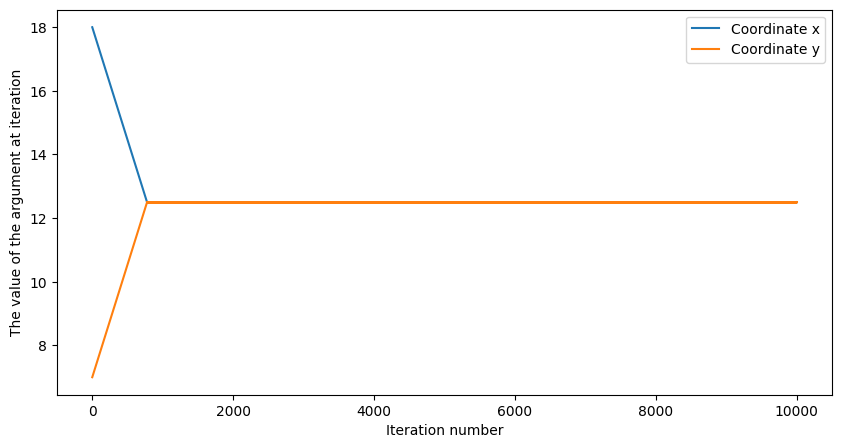

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(history_1)

plt.xlabel('Iteration number')
plt.ylabel('The value of the argument at iteration')

plt.legend(['Coordinate x', 'Coordinate y'])

plt.show()

Let's draw the path our algorithm took before converging to a minimum. Let's do this for all runs

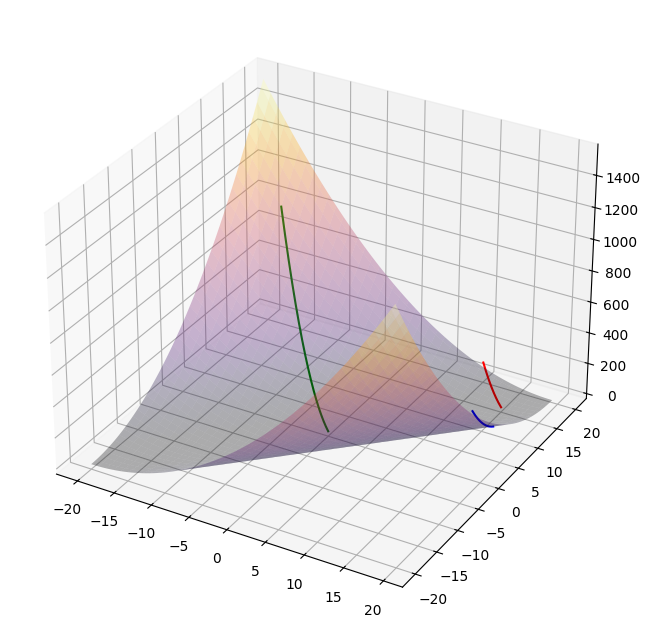

In [ ]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)

ax.plot(history_1[:, 0], history_1[:, 1], f([history_1[:, 0], history_1[:, 1]]), color='blue')
ax.plot(history_2[:, 0], history_2[:, 1], f([history_2[:, 0], history_2[:, 1]]), color='red')
ax.plot(history_3[:, 0], history_3[:, 1], f([history_3[:, 0], history_3[:, 1]]), color='green')

fig.show()

### Question

Why did we never once have a stopping condition met? How could we modify the algorithms to converge faster?

**Hint:** Think about whether the learning rate has to be constant?

We can make some adjustments in this direction and see how many iterations the algorithm would need given these adjustments!